
<img src="https://www.virtualeducationexpo.ie/wp-content/uploads/2020/08/CCT_Logo_New_Aug_17.jpg" width="400">

# <center> *CA - Machine Learning for Business* <center>

## <center>Lecturer: Dr. Muhammad Iqbal  <center>

## <center>Students: Laercio Lima ID: 2022055 <center>
## <center> Lindon Soares ID 20220..<center>
## <center> Marilia Meneses da Silva ID 2022048 <center>
## <center> Raphael Fernandes ID 2022091 <center>

### <center>*ENEM Data Set*<center>
    
 

## Table of content

## Introduction

## Business Understanding

## Data Understanding

In [1]:
# Importing the libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Reading the dataset
enem = pd.read_csv("enem_complete.csv")
enem.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


# EDA

In [3]:
#plt.style.use('fivethirtyeight')

# Data Preparation

In [4]:
# copying df
df_preparing = enem.copy()
df_preparing.head(3)

,rank,inep_code,school,state,city,school_type,location,students,ch,cn,lc,mt,rd,average_exam
0,1,23246847,FARIAS BRITO COLEGIO DE APLICACAO,Ceará,Fortaleza,Privada,Urbana,35,692.85,674.50,652.24,845.89,935.43,760.18
1,2,23246871,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,Ceará,Fortaleza,Privada,Urbana,33,695.67,676.34,652.91,836.65,915.15,755.34
2,3,31350664,COLEGIO BERNOULLI,Minas Gerais,Belo Horizonte,Privada,Urbana,280,681.58,668.20,634.47,823.80,906.64,742.94


In [5]:
# Dropping unnecessary columns
df_preparing.drop(["rank", "inep_code", 'school', 'city', 'students'], axis=1, inplace=True)
df_preparing.head(3)

,state,school_type,location,ch,cn,lc,mt,rd,average_exam
0,Ceará,Privada,Urbana,692.85,674.50,652.24,845.89,935.43,760.18
1,Ceará,Privada,Urbana,695.67,676.34,652.91,836.65,915.15,755.34
2,Minas Gerais,Privada,Urbana,681.58,668.20,634.47,823.80,906.64,742.94


In [6]:
#designating the region of each state.

def sub(x):
    
    # North
    if x == 'Amazonas' or x =='Roraima' or x =='Amapá' or x =='Pará' or x =='Tocantins' or x =='Rondônia' or x =='Acre':
        return "North"
    
    # Northeast
    elif x == 'Maranhão' or x =='Piauí' or x =='Ceará' or x =='Pernambuco' or x =='Paraíba' or x =='Rio Grande do Norte' or x =='Sergipe' or x =='Alagoas' or x =='Bahia':
        return "Northeast"
    
    # Midwest
    elif x == 'Mato Grosso' or x =='Mato Grosso do Sul' or x =='Goiás':
        return "Midwest"
    
    
    # Southeast
    elif x == 'São Paulo' or x =='Minas Gerais' or x =='Rio de Janeiro' or x =='Espirito Santo':
        return "Southeast"
    
    # South
    elif x == 'Paraná' or x =='Rio Grande do Sul' or x =='Santa Catarina':
        return "South"
    
    elif x == 'Distrito Federal':
        return "Federal District"

In [7]:
df_preparing['region'] = df_preparing['state'].apply(lambda x: sub(x))

In [8]:
df_preparing

,state,school_type,location,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,Minas Gerais,Privada,Urbana,681.58,668.20,634.47,823.80,906.64,742.94,Southeast
3,São Paulo,Privada,Urbana,677.45,682.90,638.72,836.11,868.68,740.77,Southeast
4,Minas Gerais,Privada,Urbana,666.41,657.87,630.84,809.55,938.95,740.72,Southeast
...,...,...,...,...,...,...,...,...,...,...
19593,Tocantins,Estadual,Rural,423.49,412.24,386.12,449.16,284.00,391.00,North
19594,Maranhão,Estadual,Urbana,439.87,409.58,431.09,411.73,261.25,390.70,Northeast
19595,Amazonas,Estadual,Rural,422.24,407.61,411.16,425.47,241.79,381.65,North
19596,Amazonas,Estadual,Rural,432.40,405.50,377.89,441.75,154.29,362.36,North


In [9]:
df_preparing['region'].unique()

array(['Northeast', 'Southeast', 'Federal District', 'Midwest', 'North',
       'South'], dtype=object)

<br><br>
# Unsupervised Learning

In [10]:
df_preparing.head(2)

,state,school_type,location,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [11]:
df_school_type = df_preparing.drop(['state', 'location', 'average_exam', 'region'], axis = 1)
df_school_type.head(2)

,school_type,ch,cn,lc,mt,rd
0,Privada,692.85,674.50,652.24,845.89,935.43
1,Privada,695.67,676.34,652.91,836.65,915.15


# KMeans

In [12]:
from sklearn.cluster import KMeans

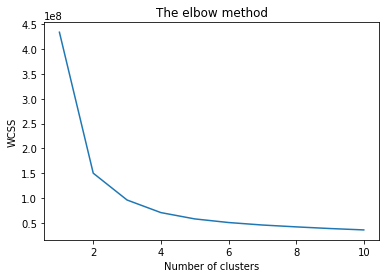

In [13]:
# Load 5 columns
x = df_school_type.iloc[:, [1, 2, 3, 4, 5]].values

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [14]:
df_cluster_KMeans = df_school_type.drop('school_type', axis = 1)
df_cluster_KMeans

,ch,cn,lc,mt,rd
0,692.85,674.50,652.24,845.89,935.43
1,695.67,676.34,652.91,836.65,915.15
2,681.58,668.20,634.47,823.80,906.64
3,677.45,682.90,638.72,836.11,868.68
4,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...
19593,423.49,412.24,386.12,449.16,284.00
19594,439.87,409.58,431.09,411.73,261.25
19595,422.24,407.61,411.16,425.47,241.79
19596,432.40,405.50,377.89,441.75,154.29


In [15]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [16]:
kmeans.fit(df_cluster_KMeans)

KMeans(n_clusters=2, random_state=0)

In [17]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
df_school_type['cluster_KMeans'] = kmeans.labels_

In [19]:
df_school_type

,school_type,ch,cn,lc,mt,rd,cluster_KMeans
0,Privada,692.85,674.50,652.24,845.89,935.43,1
1,Privada,695.67,676.34,652.91,836.65,915.15,1
2,Privada,681.58,668.20,634.47,823.80,906.64,1
3,Privada,677.45,682.90,638.72,836.11,868.68,1
4,Privada,666.41,657.87,630.84,809.55,938.95,1
...,...,...,...,...,...,...,...
19593,Estadual,423.49,412.24,386.12,449.16,284.00,0
19594,Estadual,439.87,409.58,431.09,411.73,261.25,0
19595,Estadual,422.24,407.61,411.16,425.47,241.79,0
19596,Estadual,432.40,405.50,377.89,441.75,154.29,0


# KMedoids

In [20]:
df_cluster_KMedoid = df_school_type.drop(['school_type', 'cluster_KMeans'], axis = 1)
df_cluster_KMedoid

,ch,cn,lc,mt,rd
0,692.85,674.50,652.24,845.89,935.43
1,695.67,676.34,652.91,836.65,915.15
2,681.58,668.20,634.47,823.80,906.64
3,677.45,682.90,638.72,836.11,868.68
4,666.41,657.87,630.84,809.55,938.95
...,...,...,...,...,...
19593,423.49,412.24,386.12,449.16,284.00
19594,439.87,409.58,431.09,411.73,261.25
19595,422.24,407.61,411.16,425.47,241.79
19596,432.40,405.50,377.89,441.75,154.29


In [21]:
from sklearn_extra.cluster import KMedoids

In [22]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(df_cluster_KMedoid)

In [23]:
kmedoids.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
df_school_type['cluster_KMedoids'] = kmedoids.labels_
df_school_type.head(2)

,school_type,ch,cn,lc,mt,rd,cluster_KMeans,cluster_KMedoids
0,Privada,692.85,674.50,652.24,845.89,935.43,1,0
1,Privada,695.67,676.34,652.91,836.65,915.15,1,0


# Comparinng

### Original

In [25]:
df_school_type = df_school_type.reindex(['ch', 'cn', 'lc', 'mt', 'rd', 'school_type', 'cluster_KMeans', 'cluster_KMedoids' ], axis=1)

In [26]:
df_school_type.head(2)

,ch,cn,lc,mt,rd,school_type,cluster_KMeans,cluster_KMedoids
0,692.85,674.50,652.24,845.89,935.43,Privada,1,0
1,695.67,676.34,652.91,836.65,915.15,Privada,1,0


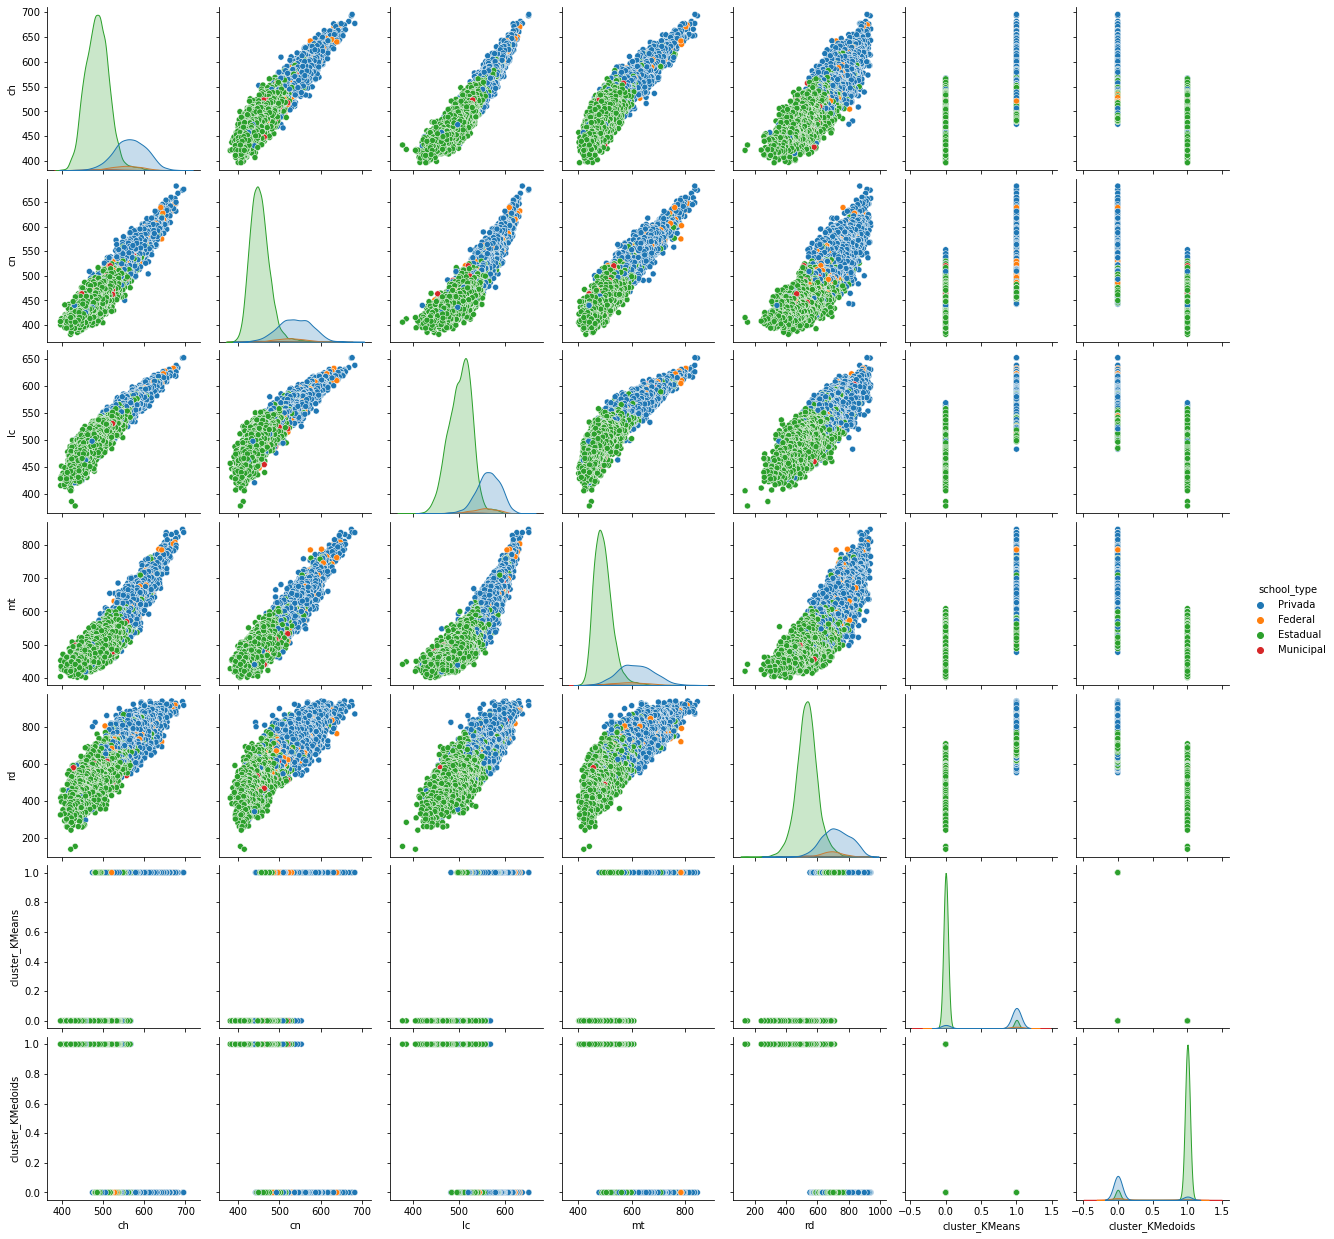

In [27]:
sns.pairplot(df_school_type, hue='school_type')

### KMeans

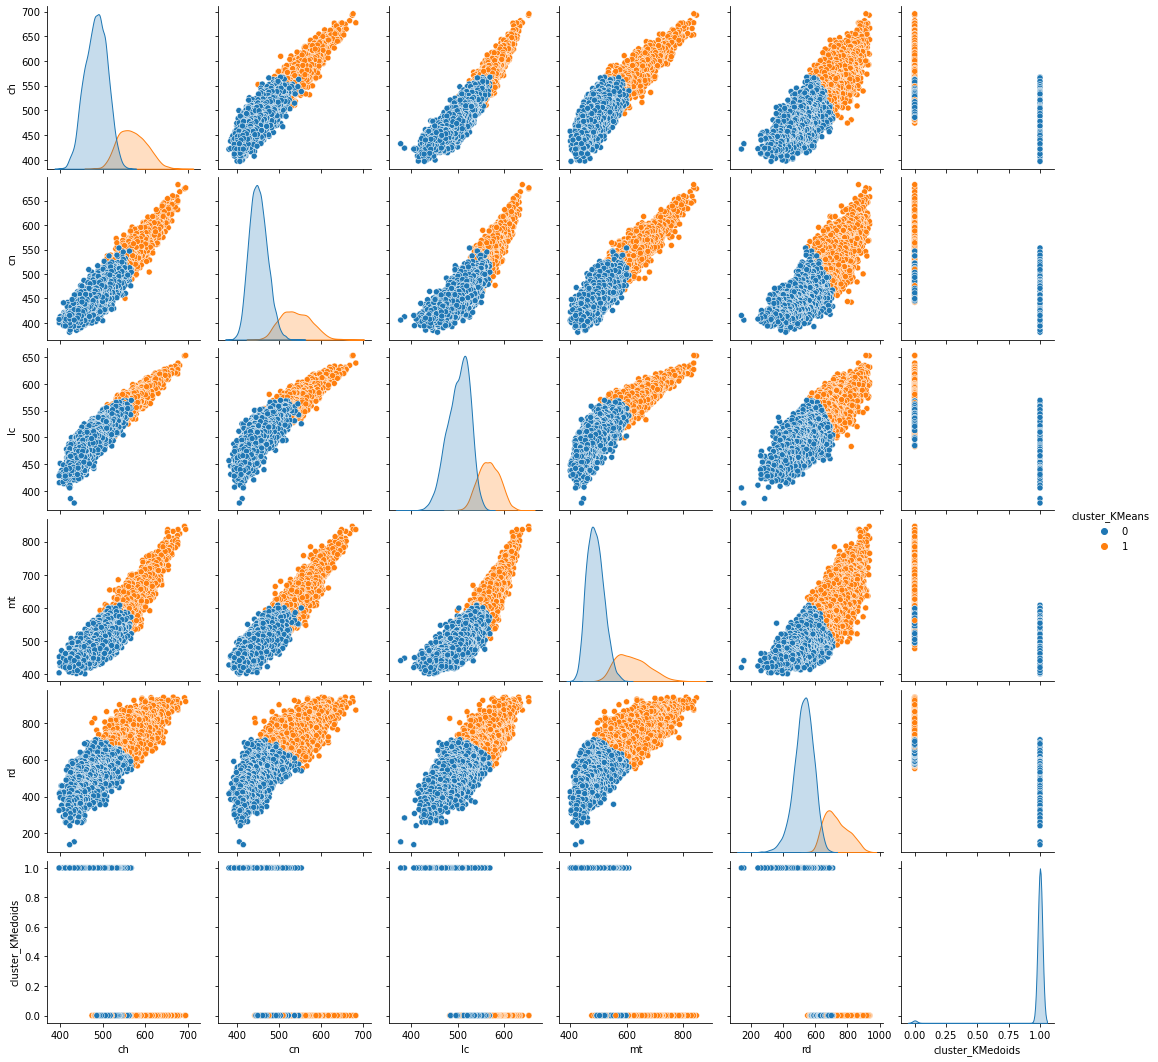

In [28]:
sns.pairplot(df_school_type, hue='cluster_KMeans')

### KMedoid

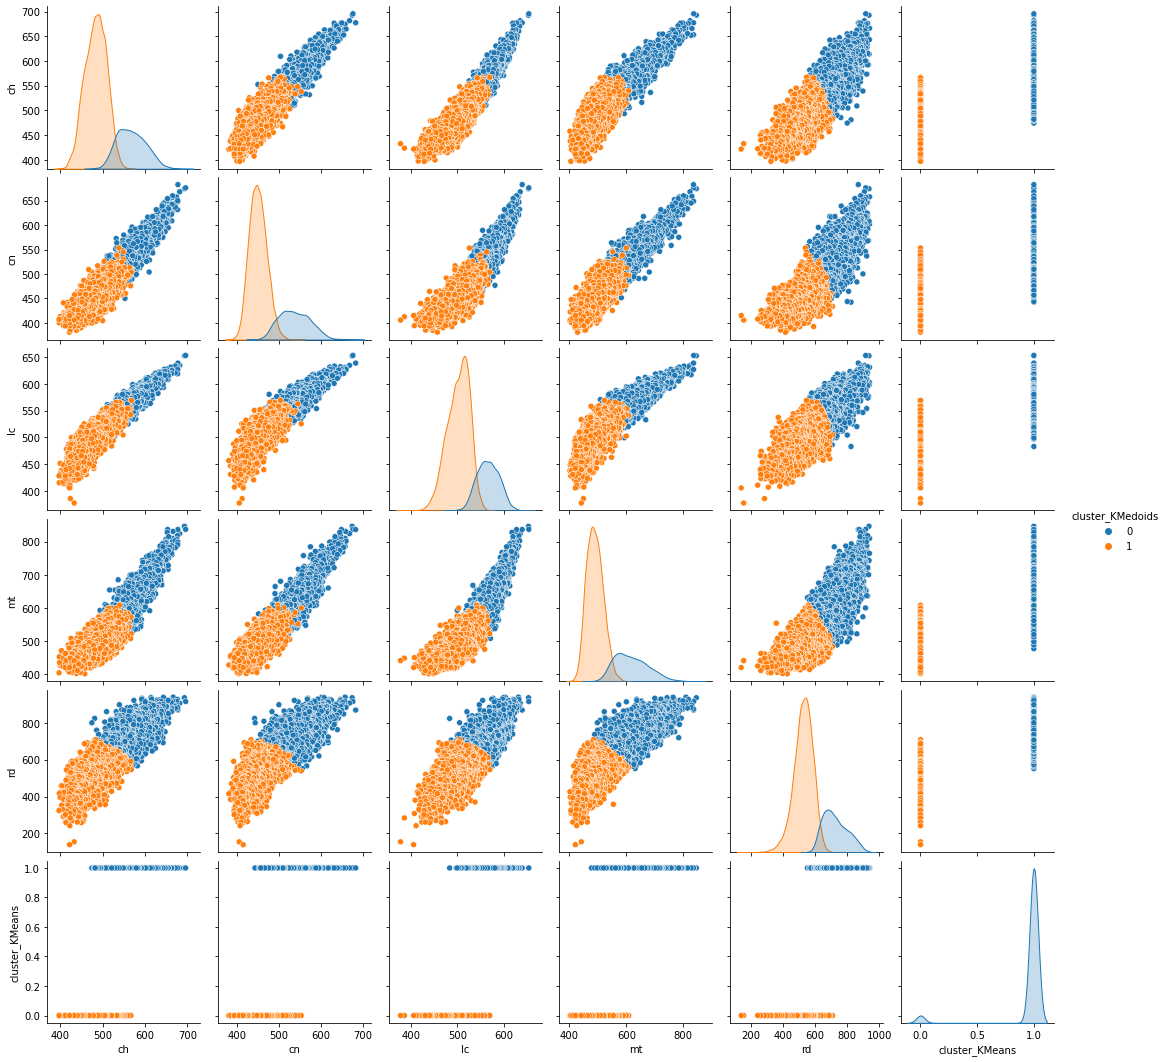

In [29]:
sns.pairplot(df_school_type, hue='cluster_KMedoids')

<br><br>
# Supervised Learning

### Encoding

In [30]:
df_preparing.head(2)

,state,school_type,location,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,695.67,676.34,652.91,836.65,915.15,755.34,Northeast


In [31]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region'])
df_encoded.head(3)

,state,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,Ceará,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,1,0,1,0,0,0,1,0,0
1,Ceará,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,1,0,1,0,0,0,1,0,0
2,Minas Gerais,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,1,0,1,0,0,0,0,0,1


In [32]:
df_encoded = df_encoded.drop(['state', 'average_exam'], axis=1)
df_encoded.head(2)

,ch,cn,lc,mt,rd,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,692.85,674.50,652.24,845.89,935.43,0,0,0,1,0,1,0,0,0,1,0,0
1,695.67,676.34,652.91,836.65,915.15,0,0,0,1,0,1,0,0,0,1,0,0


### Correlation Analysis

In [33]:
# plt.figure(1 , figsize = (15 , 7))
# n = 0 
# for x in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
#     for y in ['ch' , 'cn' , 'lc', 'mt', 'rd']:
#         n += 1
#         plt.subplot(5 , 5 , n)
#         plt.subplots_adjust(hspace = 0.8 , wspace = 0.8)
#         sns.regplot(x = x , y = y , data = df_school_type)
#         plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
# plt.show()


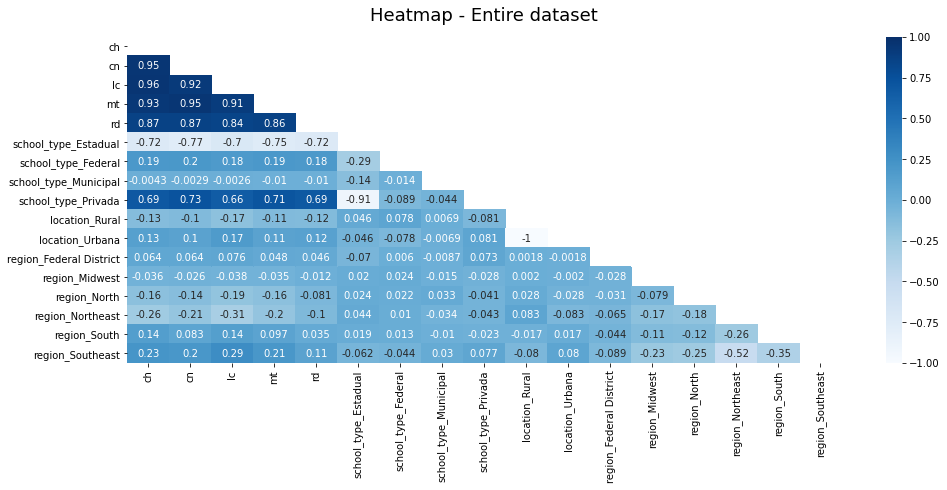

In [34]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df_encoded.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df_encoded.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Heatmap - Entire dataset', fontdict={'fontsize':18}, pad=16);

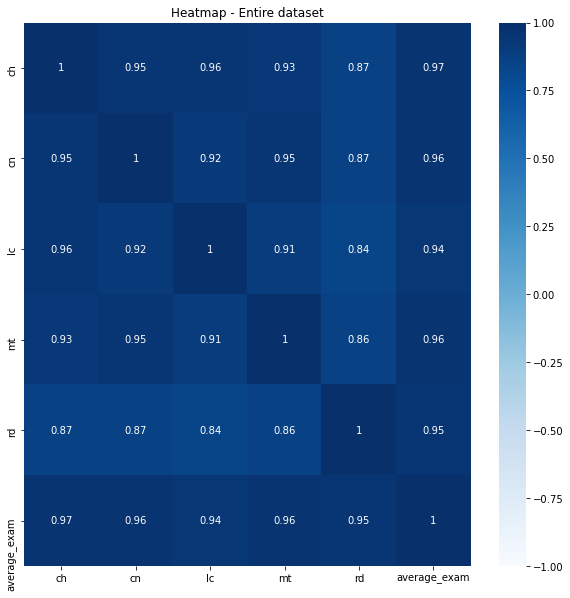

In [35]:
# Checking variables' relation
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_preparing.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='Blues').set(title='Heatmap - Entire dataset')

<br><br>
# Regression Models

### Preparing the dataset

In [36]:
# Making a copy
df_regression = df_encoded.copy()
df_regression.head(3)

,ch,cn,lc,mt,rd,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,692.85,674.50,652.24,845.89,935.43,0,0,0,1,0,1,0,0,0,1,0,0
1,695.67,676.34,652.91,836.65,915.15,0,0,0,1,0,1,0,0,0,1,0,0
2,681.58,668.20,634.47,823.80,906.64,0,0,0,1,0,1,0,0,0,0,0,1


### Spliting the dataset

In [37]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X = df_encoded.drop('rd', axis=1)
y = df_encoded['rd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)




### Linear Regression

In [38]:
# Importing the library
from sklearn.linear_model import LinearRegression

# Precision using r2 score
from sklearn.metrics import r2_score


# Training the model on the Training set
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

LinearRegression()

### Precision

In [39]:
# Precision of the model - Train set
print('The precision of the model is ')
print(regressor_LR.score(X_train, y_train))

The precision of the model is 
0.8075279838739108


In [40]:
# Predicting the Test set results
y_pred = regressor_LR.predict(X_test)

LR_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(LR_r2)

The precision of the model using r2 score is: 
0.8090857045577828


### Random Forest Regression

In [41]:
# Importing the library
from sklearn.ensemble import RandomForestRegressor

# Training the model on the Training set
regressor_RFR = RandomForestRegressor(max_depth=10, random_state=0)
regressor_RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [42]:
# Predicting the Test set results
y_pred = regressor_RFR.predict(X_test)

In [43]:
# Precision of the model
print('The precision of the model is ')
print(regressor_RFR.score(X_train, y_train))

The precision of the model is 
0.86923638780191


In [44]:
# Precision using r2 score

RFR_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(RFR_r2)

The precision of the model using r2 score is: 
0.8144382491672568


### Lasso Regression

In [45]:
# Importing the library
from sklearn.linear_model import Lasso


# Training the model on the Training set
regressor_lasso = Lasso(alpha=1.0)
regressor_lasso.fit(X_train, y_train)

Lasso()

In [46]:
# Predicting the Test set results
y_pred = regressor_lasso.predict(X_test)

In [47]:
# Precision of the model
print('The precision of the model is ')
print(regressor_lasso.score(X_train, y_train))

The precision of the model is 
0.8037149566501327


In [48]:
# Precision using r2 score

lasso_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(lasso_r2)

The precision of the model using r2 score is: 
0.8061811285175671


### Ridge Regression

In [49]:
# Importing the library
from sklearn.linear_model import Ridge

regressor_ridge = Ridge()
regressor_ridge.fit(X_train, y_train)

Ridge()

In [50]:
# Predicting the Test set results
y_pred = regressor_ridge.predict(X_test)

In [51]:
# Precision of the model
print('The precision of the model is ')
print(regressor_ridge.score(X_train, y_train))

The precision of the model is 
0.80752796110072


In [52]:
# Precision using r2 score

ridge_r2 = r2_score(y_test,y_pred)

print('The precision of the model using r2 score is: ')
print(ridge_r2)

The precision of the model using r2 score is: 
0.8090893042384919


### Which Regression Model performed better

### Score

In [53]:
print("Linear Regression:         ", regressor_LR.score(X_train, y_train))
print("Random Forest Regression:  ", regressor_RFR.score(X_train, y_train))
print("Lasso Regression:          ", regressor_lasso.score(X_train, y_train))
print("Ridge Regression:          ", regressor_ridge.score(X_train, y_train))

Linear Regression:          0.8075279838739108
Random Forest Regression:   0.86923638780191
Lasso Regression:           0.8037149566501327
Ridge Regression:           0.80752796110072


### R2 Score

In [54]:
print("(R2 Score) Linear Regression:         ", LR_r2)
print("(R2 Score) Random Forest Regression:  ", RFR_r2)
print("(R2 Score) Lasso Regression:          ", lasso_r2)
print("(R2 Score) Ridge Regression:          ", ridge_r2)

(R2 Score) Linear Regression:          0.8090857045577828
(R2 Score) Random Forest Regression:   0.8144382491672568
(R2 Score) Lasso Regression:           0.8061811285175671
(R2 Score) Ridge Regression:           0.8090893042384919


# IMPROVING REGRESSION MODELS PERFORMANCE

In [ ]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

### GridSearchCV (Linear Regression)

In [ ]:
# LinearReg_params = [{'fit_intercept':[True,False]
#                     }]

LinearReg_params = [{
                    }]

reg_LR = GridSearchCV(regressor_LR, LinearReg_params, cv = 5, scoring='neg_mean_absolute_error')

reg_LR.fit(X_train, y_train)

In [ ]:
print("Best Hyperparameters:  ", reg_LR.best_params_)

In [ ]:
print(reg_LR.best_score_)

In [ ]:
# Regression Report  - Grid Search
grid_predictions = reg_LR.predict(X_test)

In [ ]:
# Precision of the model
print('The precision of the model is ')
print(reg_LR.score(X_train, y_train))

In [ ]:
# Precision using r2 score
# from sklearn.metrics import r2_score

grid_LinReg_r2 = r2_score(y_test, grid_predictions)

print('The precision of the model using r2 score is: ')
print(grid_LinReg_r2)

### GridSearchCV (Random Forest Regression)

### GridSearchCV (Lasso Regression)

### GridSearchCV (Ridge Regression)

# Classification Models

## Preparing the dataset

In [77]:
df_preparing.head(3)

,state,school_type,location,ch,cn,lc,mt,rd,average_exam,region
0,Ceará,Privada,Urbana,692.85,674.50,652.24,845.89,935.43,760.18,Northeast
1,Ceará,Privada,Urbana,695.67,676.34,652.91,836.65,915.15,755.34,Northeast
2,Minas Gerais,Privada,Urbana,681.58,668.20,634.47,823.80,906.64,742.94,Southeast


In [78]:
# Encoding the categorical variables
df_encoded_classifier = pd.get_dummies(df_preparing, columns = ['school_type', 'location', 'region'])
df_encoded_classifier.head(3)

,state,ch,cn,lc,mt,rd,average_exam,school_type_Estadual,school_type_Federal,school_type_Municipal,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,Ceará,692.85,674.50,652.24,845.89,935.43,760.18,0,0,0,1,0,1,0,0,0,1,0,0
1,Ceará,695.67,676.34,652.91,836.65,915.15,755.34,0,0,0,1,0,1,0,0,0,1,0,0
2,Minas Gerais,681.58,668.20,634.47,823.80,906.64,742.94,0,0,0,1,0,1,0,0,0,0,0,1


In [79]:
# Label Encoder - 'region'



# # Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object 
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode labels in column 'region' and store at 'region_encoded'.
# df_encoded_classifier['region_encoded']= label_encoder.fit_transform(df_encoded_classifier['region'])
  
# df_encoded_classifier.head(2)


# # Federal District = 0
# # Mideast = 1
# # North = 2
# # Northeast = 3
# # South = 4
# # Southeast = 5


In [80]:
# Dropping in case of Label Encoder


# df_encoded_classifier = df_encoded_classifier.drop(['state', 'average_exam', 'region', 'school_type_Estadual', 'school_type_Federal', 'school_type_Municipal'], axis=1)
# df_encoded_classifier.head(2)

In [81]:
df_encoded_classifier = df_encoded_classifier.drop(['state', 'average_exam', 'school_type_Estadual', 'school_type_Federal', 'school_type_Municipal'], axis=1)
df_encoded_classifier.head(2)

,ch,cn,lc,mt,rd,school_type_Privada,location_Rural,location_Urbana,region_Federal District,region_Midwest,region_North,region_Northeast,region_South,region_Southeast
0,692.85,674.50,652.24,845.89,935.43,1,0,1,0,0,0,1,0,0
1,695.67,676.34,652.91,836.65,915.15,1,0,1,0,0,0,1,0,0


## Spliting the dataset

In [82]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
X1 = df_encoded_classifier.drop(columns='school_type_Privada')
y1 = df_encoded_classifier['school_type_Privada']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [83]:
# checking the shape after splitting
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((14698, 13), (4900, 13), (14698,), (4900,))

### Baseline Model

In [100]:
# performing DummyClassifier
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train1, y_train1)

# checking accuracy
score_DC = bm.score(X_test1, y_test1) 
print('The precision of the baseline model is:  ', score_DC)

The precision of the baseline model is:   0.7863265306122449


### Decision Tree Classifier

In [84]:
# Training the Decision Tree Classifier model on the Training set
from sklearn.tree import DecisionTreeClassifier

classifier_DTC = DecisionTreeClassifier(random_state = 1)
classifier_DTC.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=1)

In [85]:
# Predicting the Test set results
y_pred = classifier_DTC.predict(X_test1)

In [86]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test1, y_pred)
score_DTC = accuracy_score(y_test1, y_pred)

print(cm)

[[3608  245]
 [ 277  770]]


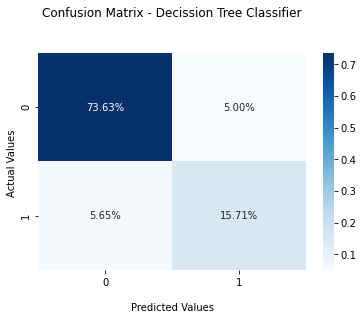

In [87]:
# Confusion Matrix Visualization

# import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Decission Tree Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# # Inserting Labels
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [88]:
# Precision of the model
print('The precision of the model is:  ', score_DTC)

# Classification Report
print(classification_report(y_test1, y_pred))

The precision of the model is:   0.8934693877551021
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3853
           1       0.76      0.74      0.75      1047

    accuracy                           0.89      4900
   macro avg       0.84      0.84      0.84      4900
weighted avg       0.89      0.89      0.89      4900



### Logistic Regression

In [89]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression

classifier_LogR = LogisticRegression()
classifier_LogR.fit(X_train1, y_train1)

LogisticRegression()

In [90]:
# Predicting the Test set results
y_pred = classifier_LogR.predict(X_test1)

In [91]:
# Making the Confusion Matrix

# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_LogR = accuracy_score(y_test1, y_pred)

print(cm)

[[3711  142]
 [ 365  682]]


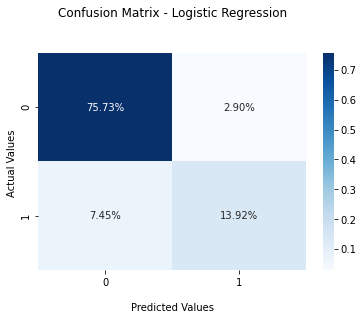

In [92]:
# Confusion Matrix Visualization

# import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Plotting the Confusion Matrix using percentages
plt.show()

In [93]:
# Precision of the model
print('The precision of the model is:  ', score_LogR)

# Classification Report
print(classification_report(y_test1, y_pred))

The precision of the model is:   0.8965306122448979
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3853
           1       0.83      0.65      0.73      1047

    accuracy                           0.90      4900
   macro avg       0.87      0.81      0.83      4900
weighted avg       0.89      0.90      0.89      4900



### KNeighbors Classifier (KNN)

In [94]:
# Training the KNN model on the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier_KNC = KNeighborsClassifier()
classifier_KNC.fit(X_train1, y_train1)

KNeighborsClassifier()

In [95]:
# Predicting the Test set results
y_pred = classifier_KNC.predict(X_test1)

In [96]:
# Making the Confusion Matrix

# from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
cm = confusion_matrix(y_test1, y_pred)
score_KNC = precision_score(y_test1, y_pred, average='macro')

print(cm)

[[3660  193]
 [ 267  780]]


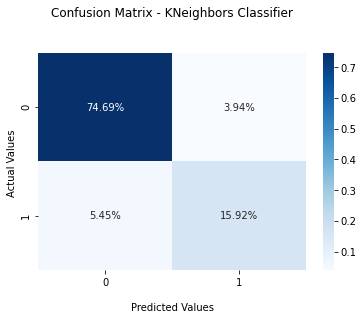

In [97]:
# Confusion Matrix Visualization

# import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - KNeighbors Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Plotting the Confusion Matrix using percentages
plt.show()

In [98]:
# Precision of the model
print('The precision of the model is:  ', score_KNC)

# Classification Report
print(classification_report(y_test1, y_pred))

The precision of the model is:   0.8668267830349929
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3853
           1       0.80      0.74      0.77      1047

    accuracy                           0.91      4900
   macro avg       0.87      0.85      0.86      4900
weighted avg       0.90      0.91      0.90      4900



In [99]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

### SVC

In [101]:
# Training the SVC model on the Training set
from sklearn.svm import SVC
# train the model on train set
classifier_SVC = SVC()
classifier_SVC.fit(X_train1, y_train1)

SVC()

In [102]:
# Predicting the Test set results
y_pred = classifier_SVC.predict(X_test1)

In [103]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test1, y_pred)
score_SVC = accuracy_score(y_test1, y_pred)

print(cm)

[[3684  169]
 [ 235  812]]


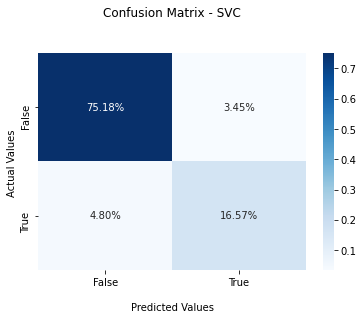

In [104]:
# Confusion Matrix Visualization

# import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [105]:
# Precision of the model
print('The precision of the model is:  ', score_SVC)

# Classification Report
print(classification_report(y_test1, y_pred))

The precision of the model is:   0.9175510204081633
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3853
           1       0.83      0.78      0.80      1047

    accuracy                           0.92      4900
   macro avg       0.88      0.87      0.87      4900
weighted avg       0.92      0.92      0.92      4900



### Random Forest Classifier

In [106]:
# Training the Random Forest Classifier model on the Training set
from sklearn.ensemble import RandomForestClassifier

classifier_RFC = RandomForestClassifier(random_state = 1)
classifier_RFC.fit(X_train1, y_train1)

RandomForestClassifier(random_state=1)

In [107]:
# Predicting the Test set results
y_pred = classifier_RFC.predict(X_test1)

In [108]:
# Making the Confusion Matrix

# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
score_RFC = accuracy_score(y_test1, y_pred)

print(cm)

[[3664  189]
 [ 188  859]]


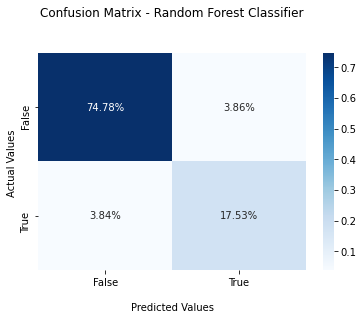

In [109]:
# Confusion Matrix Visualization

# import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Random Forest Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [110]:
# Precision of the model
print('The precision of the model is:  ', score_RFC)

# Classification Report
print(classification_report(y_test1, y_pred))

The precision of the model is:   0.9230612244897959
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3853
           1       0.82      0.82      0.82      1047

    accuracy                           0.92      4900
   macro avg       0.89      0.89      0.89      4900
weighted avg       0.92      0.92      0.92      4900



### Which Classification Model performed better

In [112]:
print("Decision Tree Classifier:   ", score_DTC)
print("Logistic Regression:        ", score_LogR)
print("KNeighbors Classifier:      ", score_KNC)
print("SVC:                        ", score_SVC)
print("Random Forest Classifier:   ", score_RFC)

Decision Tree Classifier:    0.8934693877551021
Logistic Regression:         0.8965306122448979
KNeighbors Classifier:       0.8668267830349929
SVC:                         0.9175510204081633
Random Forest Classifier:    0.9230612244897959


# IMPROVING CLASSIFICATION MODELS PERFORMANCE

In [113]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

### GridSearchCV (Decision Tree Classifier)

In [114]:
DTC_params = [{'criterion':['gini','entropy'],
               'max_depth':[4,6,10,20,30], 
               'max_leaf_nodes': [8, 16, 32], 
               'min_samples_split': [2, 3]
              }]

clf_DTC = GridSearchCV(classifier_DTC, DTC_params, cv = 5, scoring='accuracy')

clf_DTC.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                        30, 40, 50, 70, 90, 120, 150],
                          'max_leaf_nodes': [2, 4, 8, 16, 32, 50, 60, 70, 80,
                                             90, 100],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')

In [115]:
print("Best Hyperparameters:  ", clf_DTC.best_params_)

Best Hyperparameters:   {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 32, 'min_samples_split': 2}


In [116]:
print(clf_DTC.best_score_)

0.9171308632370578


In [117]:
# Classification Report  - Grid Search
grid_predictions = clf_DTC.predict(X_test1)
 
# print classification report
print(classification_report(y_test1, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3853
           1       0.80      0.83      0.81      1047

    accuracy                           0.92      4900
   macro avg       0.88      0.89      0.88      4900
weighted avg       0.92      0.92      0.92      4900



In [118]:
print("Accuracy of the Decission Tree Classifier model:                                 ", score_DTC)
print("Accuracy of the Decission Tree Classifier model using better Hyperparameters :   ", clf_DTC.best_score_)

Accuracy of the Decission Tree Classifier model:                                  0.8934693877551021
Accuracy of the Decission Tree Classifier model using better Hyperparameters :    0.9171308632370578


### GridSearchCV (Logistic Regression)

In [119]:
LogR_params = [{'penalty' : ['l1','l2'], 
                'C'       : [10.0, 25.0, 50.0],
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
               }]

clf_LogR = GridSearchCV(classifier_LogR, LogR_params, cv = 5, scoring='accuracy')

clf_LogR.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [5.0, 10.0, 25.0, 50.0], 'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='accuracy')

In [120]:
print(clf_LogR.best_params_)

{'C': 50.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [121]:
print(clf_LogR.best_score_)

0.9091023557142395


In [122]:
# Classification Report  - Grid Search
grid_predictions = clf_LogR.predict(X_test1)
 
# print classification report
print(classification_report(y_test1, grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3853
           1       0.84      0.75      0.79      1047

    accuracy                           0.92      4900
   macro avg       0.89      0.86      0.87      4900
weighted avg       0.91      0.92      0.91      4900



In [123]:
print("Accuracy of the Logistic Regression model:                                 ", score_LogR)
print("Accuracy of the Logistic Regression model using better Hyperparameters :   ", clf_LogR.best_score_)

Accuracy of the Logistic Regression model:                                  0.8965306122448979
Accuracy of the Logistic Regression model using better Hyperparameters :    0.9091023557142395


### GridSearchCV (KNeighbors Classifier)

In [124]:
KNC_params = [{'n_neighbors' : [7, 9, 11],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'chebyshev'],
               'leaf_size' : [7, 10, 13],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'p' : [1, 2]                            
              }]

clf_KNC = GridSearchCV(classifier_KNC, KNC_params, cv = 5, scoring='accuracy')

clf_KNC.fit(X_train1, y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [7, 10, 13],
                          'metric': ['minkowski', 'chebyshev'],
                          'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [125]:
print(clf_KNC.best_params_)

{'algorithm': 'auto', 'leaf_size': 7, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [126]:
print(clf_KNC.best_score_)

0.9123008849557521


In [127]:
# Classification Report  - Grid Search
grid_predictions = clf_KNC.predict(X_test1)
 
# print classification report
print(classification_report(y_test1, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3853
           1       0.81      0.77      0.79      1047

    accuracy                           0.91      4900
   macro avg       0.88      0.86      0.87      4900
weighted avg       0.91      0.91      0.91      4900



In [128]:
print("Accuracy of the KNeighbors Classifier model:                                 ", score_KNC)
print("Accuracy of the KNeighbors Classifier model using better Hyperparameters :   ", clf_KNC.best_score_)

Accuracy of the KNeighbors Classifier model:                                  0.8668267830349929
Accuracy of the KNeighbors Classifier model using better Hyperparameters :    0.9123008849557521


### GridSearchCV (SVC)

In [ ]:
# defining parameter range
SVC_params = [{'C': [10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']
              }]
 
clf_SVC = GridSearchCV(classifier_SVC, SVC_params, cv = 5, scoring='accuracy')
 
clf_SVC.fit(X_train1, y_train1)

In [ ]:
print("Best Hyperparameters:  ", clf_SVC.best_params_)

In [ ]:
print(clf_SVC.best_score_)

In [ ]:
# Classification Report  - Grid Search
grid_predictions = clf_SVC.predict(X_test1)
 
# print classification report
print(classification_report(y_test1, grid_predictions))

In [ ]:
print("Accuracy of the Decission Tree Classifier model:                                 ", score_SVC)
print("Accuracy of the Decission Tree Classifier model using better Hyperparameters :   ", clf_SVC.best_score_)

### GridSearchCV (Random Forest Classifier)

In [ ]:
RFC_params = [{'max_depth': [3, 6, 9],
               'max_features': [1, 2, 3], 
               'n_estimators': [100, 300, 500],   
               'criterion' :['gini', 'entropy']
               
              }]

clf_RFC = GridSearchCV(classifier_RFC, RFC_params, cv = 5, scoring='accuracy')

clf_RFC.fit(X_train1, y_train1)

In [ ]:
print(clf_RFC.best_params_)

In [ ]:
print(clf_RFC.best_score_)

In [ ]:
# Classification Report  - Grid Search
grid_predictions = clf_RFC.predict(X_test1)
 
# print classification report
print(classification_report(y_test1, grid_predictions))

In [ ]:
print("Accuracy of the Random Forest Classifier model:                                 ", score_RFC)
print("Accuracy of the Random Forest Classifier model using better Hyperparameters :   ", clf_RFC.best_score_)

### Summarizing Performance

In [ ]:
print("Accuracy of the Decission Tree Classifier model:                                 ", score_DTC)
print("Accuracy of the Decission Tree Classifier model using better Hyperparameters :   ", clf_DTC.best_score_)

print("Accuracy of the Logistic Regression model:                                       ", score_LogR)
print("Accuracy of the Logistic Regression model using better Hyperparameters :         ", clf_LogR.best_score_)

print("Accuracy of the KNeighbors Classifier model:                                     ", score_KNC)
print("Accuracy of the KNeighbors Classifier model using better Hyperparameters :       ", clf_KNC.best_score_)

print("Accuracy of the SVC model:                                                       ", score_SVC)
print("Accuracy of the SVC model using better Hyperparameters :                         ", clf_SVC.best_score_)

print("Accuracy of the Random Forest Classifier model:                                  ", score_RFC)
print("Accuracy of the Random Forest Classifier model using better Hyperparameters :    ", clf_RFC.best_score_)


# COMPARISON OF ML MODELING OUTCOMES

### Checking performance on the Training Set

In [ ]:
from sklearn import model_selection

# preparing the models
models = []

models.append(('DTC', DecisionTreeClassifier()))
models.append(('DTC+H', DecisionTreeClassifier(criterion = 'gini', 
                                               max_depth = 6, 
                                               max_leaf_nodes = 32, 
                                               min_samples_split = 2, 
                                               random_state = 1)))


models.append(('LR', LogisticRegression()))
models.append(('LR+H', LogisticRegression(C = 50.0, 
                                          penalty = 'l1', 
                                          solver = 'liblinear')))



models.append(('KNC', KNeighborsClassifier()))
models.append(('KNC+H', KNeighborsClassifier(metric = 'minkowski',
                                             algorithm =  'auto', 
                                             leaf_size = 7, 
                                             p = 1, 
                                             n_neighbors = 11, 
                                             weights = 'uniform')))








# FALTA PEGAR OS PARAMETROS ABAIXO:




models.append(('SVC', SVC()))
models.append(('SVC+H', SVC(C = 1000,               
                            gamma = 1,               
                            kernel = 'rbf')))





models.append(('RFC', RandomForestClassifier()))
models.append(('RFC+H', RandomForestClassifier(criterion = 'entropy', 
                                               max_depth = 6, 
                                               max_features = 1, 
                                               n_estimators = 300, 
                                               random_state = 1)))









# evaluating each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train1, y_train1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# boxplot algorithm comparison
fig = plt.figure(figsize =(8, 8))
fig.suptitle('Comparison of ML modelling outcomes - Train Set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Checking performance on the Test Set

In [ ]:
from sklearn import model_selection

# preparing the models
models = []

models.append(('SVC', SVC()))
models.append(('SVC+H', SVC(C = 1000,               
                            gamma = 1,               
                            kernel = 'rbf')))


models.append(('DTC', DecisionTreeClassifier()))
models.append(('DTC+H', DecisionTreeClassifier(criterion = 'gini', 
                                               max_depth = 5, 
                                               max_leaf_nodes = 16, 
                                               min_samples_split = 2, 
                                               random_state = 1)))


models.append(('RFC', RandomForestClassifier()))
models.append(('RFC+H', RandomForestClassifier(criterion = 'entropy', 
                                               max_depth = 6, 
                                               max_features = 1, 
                                               n_estimators = 300, 
                                               random_state = 1)))


models.append(('LR', LogisticRegression()))
models.append(('LR+H', LogisticRegression(C = 5.0, 
                                          penalty = 'l1', 
                                          solver = 'liblinear')))


models.append(('KNC', KNeighborsClassifier()))
models.append(('KNC+H', KNeighborsClassifier(metric = 'minkowski',
                                             algorithm =  'auto', 
                                             leaf_size = 7, 
                                             p = 1, 
                                             n_neighbors = 5, 
                                             weights = 'uniform')))



# evaluating each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_test1, y_test1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# boxplot algorithm comparison
fig = plt.figure(figsize =(8, 8))
fig.suptitle('Comparison of ML modelling outcomes - Test set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()